# Peer-graded Assignment: Эксперименты с моделью

На прошлой неделе вы поучаствовали в соревновании на kaggle и, наверняка, большинство успешно справилось с прохождением baseline, а значит пора двигаться дальше - заняться оптимизацией модели, провести серию экспериментов и построить сильное финальное решения.

В этом задании вам нужно провести ряд эскпериментов, оценить качество полученных в процессе экспериментирования моделей и выбрать лучшее решение. 

Задание будет оцениваться на основании загруженного jupyther notebook и развернутых ответов на поставленные вопросы.

## Инструкции

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn import cross_validation
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.utils import shuffle
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
%pylab inline

C:\Users\mypc\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


C:\Users\mypc\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def label_encoding(df):
    label_encoder = LabelEncoder()
    for i in range(40):
        integer_encoded = label_encoder.fit_transform(df[df.columns[190 + i]].fillna(0).values)
        for j in range(len(df)):
            if type(df[df.columns[190 + i]].values[j]) == str:
                df[df.columns[190 + i]].values[j] = integer_encoded[j]
    df = df.fillna(0.0)
    return df


def estimation(train_data, test_data):
    estimator.fit(train_data[train_data.columns[:230]], train_data['labels'], eval_metric='auc')
    xgb_predictions = estimator.predict(test_data[test_data.columns[:230]]) 
    xgb_predictions_proba = estimator.predict_proba(test_data[test_data.columns[:230]]).transpose()[1]
    return xgb_predictions_proba

In [4]:
data = pd.read_csv('orange_small_churn_data.train')
labels = pd.read_table('orange_small_churn_labels.train', header = -1, names = ["labels"])
data['labels'] = labels
data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,labels
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN,-1


In [8]:
encoded_data = pd.read_csv('orange_small_churn_data.train')
labels = pd.read_table('orange_small_churn_labels.train', header = -1, names = ["labels"])
encoded_data['labels'] = labels
encoded_data = label_encoding(encoded_data)

1\. Начнем с простого. Давайте оценим как много объектов действительно нужно для построения качественной модели. Для обучения доступна достаточно большая выборка и может так оказаться, что начиная с некоторого момента рост размера обучающей выборки перестает влиять на качество модели. Постройте кривые обучения, обучая модель на выборках разного размера начиная с небольшого количество объектов в обучающей выборке и постепенно наращивая её размер с некоторым шагом. Обратите внимание на `sklearn.model_selection.learning_curve`

In [9]:
estimator = xgb.XGBClassifier(learning_rate = 0.05, max_delta_step = 1, max_depth = 3, min_child_weight = 20, n_estimators = 500,
                              subsample = 0.1)
scoring = 'roc_auc'

train_encoded_data, test_encoded_data = model_selection.train_test_split(encoded_data, test_size = 0.3)
cv = cross_validation.StratifiedKFold(train_encoded_data['labels'], n_folds= 4)

In [10]:
train_sizes, train_scores, test_scores = learning_curve(estimator, train_encoded_data[train_encoded_data.columns[:230]], 
                                                        train_encoded_data['labels'], train_sizes = np.linspace(0.1, 1.0, 6),
                                                        cv=cv, scoring = scoring)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

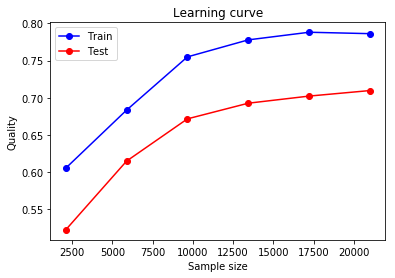

In [11]:
plt.figure()
plt.title("Learning curve")
plt.xlabel("Sample size")
plt.ylabel("Quality")

plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
    label="Train")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r",
    label="Test")
plt.legend()

###### Результат
При росте размера выборки качество растет и на обучении и, на тесте

2\. Часто несбалансированные по классам выборки приводят к различным проблемам при обучении моделей. Давайте попробуем по-разному обработать выборку, поиграть с распределением объектов по классам и сделать выводы о том, как соотношение классов влияет на качество модели.

2.1\. Задайте веса объектам так, чтобы соотношение классов с учетом весов объектов изменилось. Попробуйте не менее трёх различных вариантов весов. Меняются ли результаты классификации? Как это сказывается на качестве модели? Какой вариант выглядит наиболее оптимальным с точки зрения качества?

In [12]:
weight_ratio = float(len(train_encoded_data['labels'][train_encoded_data['labels'] == -1])) / float(len(train_encoded_data['labels'][train_encoded_data['labels'] == 1]))
print weight_ratio

12.5396518375


In [19]:
w1 = np.array([1]*train_encoded_data['labels'].shape[0])
w1[train_encoded_data['labels'] == -1] = 1
w1[train_encoded_data['labels'] == 1] = weight_ratio
estimator.fit(train_encoded_data[train_encoded_data.columns[:230]], train_encoded_data['labels'], sample_weight = w1, eval_metric='auc')
xgb_predictions = estimator.predict(test_encoded_data[test_encoded_data.columns[:230]]) 
xgb_predictions_proba = estimator.predict_proba(test_encoded_data[test_encoded_data.columns[:230]]).transpose()[1]
print roc_auc_score(test_encoded_data['labels'], xgb_predictions_proba)

0.697053061221


In [20]:
w2 = np.array([1]*train_encoded_data['labels'].shape[0])
w2[train_encoded_data['labels'] == -1] = 10.
w2[train_encoded_data['labels'] == 1] = 1.
estimator.fit(train_encoded_data[train_encoded_data.columns[:230]], train_encoded_data['labels'], sample_weight = w2, eval_metric='auc')
xgb_predictions = estimator.predict(test_encoded_data[test_encoded_data.columns[:230]]) 
xgb_predictions_proba = estimator.predict_proba(test_encoded_data[test_encoded_data.columns[:230]]).transpose()[1]
print roc_auc_score(test_encoded_data['labels'], xgb_predictions_proba)

0.714421117097


In [21]:
w3 = np.array([1]*train_encoded_data['labels'].shape[0])
w3[train_encoded_data['labels'] == -1] = 1.
w3[train_encoded_data['labels'] == 1] = 1.
estimator.fit(train_encoded_data[train_encoded_data.columns[:230]], train_encoded_data['labels'], sample_weight = w3, eval_metric='auc')
xgb_predictions = estimator.predict(test_encoded_data[test_encoded_data.columns[:230]]) 
xgb_predictions_proba = estimator.predict_proba(test_encoded_data[test_encoded_data.columns[:230]]).transpose()[1]
print roc_auc_score(test_encoded_data['labels'], xgb_predictions_proba)

0.721636302546


In [25]:
w4 = np.array([1]*train_encoded_data['labels'].shape[0])
w4[train_encoded_data['labels'] == -1] = 2.
w4[train_encoded_data['labels'] == 1] = 1.
estimator.fit(train_encoded_data[train_encoded_data.columns[:230]], train_encoded_data['labels'], sample_weight = w4, eval_metric='auc')
xgb_predictions = estimator.predict(test_encoded_data[test_encoded_data.columns[:230]]) 
xgb_predictions_proba = estimator.predict_proba(test_encoded_data[test_encoded_data.columns[:230]]).transpose()[1]
print roc_auc_score(test_encoded_data['labels'], xgb_predictions_proba)

0.717685465256


###### Ответ
Результаты классификации меняются. Качество модели может как повыситься, так и понизиться. Оптимум - соотношение весов классов 1:1

2.2\. Примените к выборке технологию undersampling: для этого нужно убрать из обучения некоторое количество объектов большего класса таким образом, чтобы соотношение классов изменилось. Попробуйте не менее трёх различных вариантов undersampling (варианты могут отличаться как по количество отфильтрованных объектов, так и по принципу выборка объектов для отсеивания из выборки). Меняются ли результаты классификации? Как это сказывается на качестве модели? Какой вариант выглядит наиболее оптимальным с точки зрения качества?

In [28]:
# делаем классы равного объема
dataChurn = train_encoded_data[train_encoded_data['labels'] == 1]
dataNoChurn = train_encoded_data[train_encoded_data['labels'] == -1]
countFirst = len(dataChurn)
dataChurn = dataChurn.append(dataNoChurn.iloc[:countFirst,:])
print roc_auc_score(test_encoded_data['labels'], estimation(dataChurn, test_encoded_data))

0.694074468879


In [30]:
# размер класса nonchurn делаем в 2 раза меньше, чем размер класса churn
dataChurn2 = train_encoded_data[train_encoded_data['labels'] == 1]
dataNoChurn2 = train_encoded_data[train_encoded_data['labels'] == -1]
countHalf = len(dataChurn2) / 2
dataChurn2 = dataChurn2.append(dataNoChurn2.iloc[:countHalf,:])
roc_auc_score(test_encoded_data['labels'], estimation(dataChurn2, test_encoded_data))

0.63464559924126762

In [31]:
# отсеиваем объекты, у которых значение переменной Var228 < 10 (в качетсве примера отсеивания по принципу выбора объетов 
# из выборки)
dataChurn3 = train_encoded_data[train_encoded_data['labels'] == 1]
dataNoChurn3 = train_encoded_data[train_encoded_data['labels'] == -1]
dataChurn3 = dataChurn3.append(dataNoChurn3[dataNoChurn3[dataNoChurn3.columns[227]] > 10])
roc_auc_score(test_encoded_data['labels'], estimation(dataChurn3, test_encoded_data))

0.60687247704818803

###### Ответ
Результаты классификации меняются, причем наиболее высокое качество дает уравнивание объемов классов.

3\. Теперь перейдем к работе с признаками. Ранее вы реализовали несколько стратегий для обработки пропущенных значений. Сравните эти стратегии между собой с помощью оценки качества моделей кросс-валидации, построенных на датасетах с использованием различных стратегий. Как обработка пропущенных значений сказывается на качестве модели? Какой вариант выглядит наиболее оптимальным с точки зрения качества?

In [58]:
# Nan -> среднее значение по признаку
enc_data = pd.read_csv('orange_small_churn_data.train')
labels = pd.read_table('orange_small_churn_labels.train', header = -1, names = ["labels"])
enc_data['labels'] = labels

label_encoder = LabelEncoder()
for i in range(40):
    integer_encoded = label_encoder.fit_transform(enc_data[enc_data.columns[190 + i]].fillna(0.).values)
    for j in range(len(enc_data)):
        if type(enc_data[enc_data.columns[190 + i]].values[j]) == str:
            enc_data[enc_data.columns[190 + i]].values[j] = integer_encoded[j]

            
for i in range(230):
    enc_data[enc_data.columns[i]] = enc_data[enc_data.columns[i]].fillna(enc_data[enc_data.columns[i]].mean())
    
    
Xy_train, Xy_test = model_selection.train_test_split(enc_data, test_size=0.3)

roc_auc_score(Xy_test['labels'], estimation(Xy_train, Xy_test))

0.71482239160886529

In [59]:
# Nan -> мода (если мода = Nan, то Nan -> 0) 
labels = pd.read_table('orange_small_churn_labels.train', header = -1, names = ["labels"])
enc_data['labels'] = labels

label_encoder = LabelEncoder()
for i in range(40):
    integer_encoded = label_encoder.fit_transform(enc_data[enc_data.columns[190 + i]].fillna(0.).values)
    for j in range(len(enc_data)):
        if type(enc_data[enc_data.columns[190 + i]].values[j]) == str:
            enc_data[enc_data.columns[190 + i]].values[j] = integer_encoded[j]

            
for i in range(230):
    enc_data[enc_data.columns[i]] = enc_data[enc_data.columns[i]].fillna(enc_data[enc_data.columns[i]].mode())
    
    
Xy_train, Xy_test = model_selection.train_test_split(enc_data, test_size=0.3)

roc_auc_score(Xy_test['labels'], estimation(Xy_train, Xy_test))

0.72203436935712084

In [60]:
# Nan -> 0
labels = pd.read_table('orange_small_churn_labels.train', header = -1, names = ["labels"])
enc_data['labels'] = labels

label_encoder = LabelEncoder()
for i in range(40):
    integer_encoded = label_encoder.fit_transform(enc_data[enc_data.columns[190 + i]].fillna(0.).values)
    for j in range(len(enc_data)):
        if type(enc_data[enc_data.columns[190 + i]].values[j]) == str:
            enc_data[enc_data.columns[190 + i]].values[j] = integer_encoded[j]

            
for i in range(230):
    enc_data[enc_data.columns[i]] = enc_data[enc_data.columns[i]].fillna(0.)
    
    
Xy_train, Xy_test = model_selection.train_test_split(enc_data, test_size=0.3)

roc_auc_score(Xy_test['labels'], estimation(Xy_train, Xy_test))

0.7258162460419193

###### Ответ
Результаты классификации меняются. Наиболее высокое качество дает вариант замены nan на нуль.

4\. Также вы уже реализовали несколько стратегий для обработки категориальных признаков. Сравните эти стратегии между собой с помощью оценки качества моделей по кросс-валидации, построенных на датасетах с использованием различных стратегий. Как обработка категориальных признаков сказывается на качестве модели? Какой вариант выглядит наиболее оптимальным с точки зрения качества?

In [36]:
raw_data = pd.read_csv('orange_small_churn_data.train')
raw_labels = pd.read_table('orange_small_churn_labels.train', header = -1, names = ["labels"])
raw_data['labels'] = raw_labels

In [37]:
# Label Encoding
le_data = raw_data
label_encoder = LabelEncoder()
for i in range(40):
    integer_encoded = label_encoder.fit_transform(le_data[le_data.columns[190 + i]].fillna(0).values)
    for j in range(len(le_data)):
        if type(le_data[le_data.columns[190 + i]].values[j]) == str:
            le_data[le_data.columns[190 + i]].values[j] = integer_encoded[j]
le_data = le_data.fillna(0.0)

train_le_data, test_le_data = model_selection.train_test_split(le_data, test_size = 0.3)

roc_auc_score(test_le_data['labels'], estimation(train_le_data, test_le_data))

0.72649029117486286

In [38]:
# Frequency Encoding
fr_data = raw_data

for i in range(40):
    curr_col = fr_data[fr_data.columns[190 + i]]
    counter = Counter(curr_col.values)
    for j in range(len(curr_col)):
        if type(curr_col.values[j]) == str:
            curr_col.values[j] = 1.0 * counter[curr_col.values[j]] / len(curr_col)

fr_data = fr_data.fillna(0.0)

train_fr_data, test_fr_data = model_selection.train_test_split(fr_data, test_size = 0.3)

roc_auc_score(test_fr_data['labels'], estimation(train_fr_data, test_fr_data))

0.71987739265128248

###### Ответ
Label encoding эффективнее Frequency encoding

5\. Все ли признаки оказались полезными для построения моделей? Проведите процедуру отбора признаков, попробуйте разные варианты отбора (обратите внимание на модуль `sklearn.feature_selection`). Например, можно выбрасывать случайные признаки или строить отбор на основе l1-регуляризации - отфильтровать из обучения признаки, которые получат нулевой вес при построении регрессии с l1-регуляризацией (`sklearn.linear_model.Lasso`). И всегда можно придумать что-то своё=) Попробуйте как минимум 2 различные стратегии, сравните результаты. Помог ли отбор признаков улучшить качество модели? Поясните свой ответ.

In [40]:
indices1 = np.argsort(estimator.feature_importances_)[::-1]

In [50]:
train_df = train_le_data[train_le_data.columns[:230]]
test_df = test_le_data[test_le_data.columns[:230]]
for i in [10, 20, 50]:
    print('Number of features: ', i)
    train_le_data_selection = train_df[train_df.columns[indices1[0:i]]]
    train_le_data_selection['labels'] = train_le_data['labels']
    test_le_data_selection = test_df[test_df.columns[indices1[0:i]]]
    test_le_data_selection['labels'] = test_le_data['labels']
    print roc_auc_score(test_fr_data_selection['labels'], estimation(train_le_data_selection, test_le_data_selection))

('Number of features: ', 10)


C:\Users\mypc\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mypc\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.781253278255
('Number of features: ', 20)
0.782473012805
('Number of features: ', 50)
0.780898779631


In [51]:
train_df = train_le_data[train_le_data.columns[:230]]
test_df = test_le_data[test_le_data.columns[:230]]

lasso = linear_model.Lasso(alpha = 0.001)
lasso.fit(train_df, train_le_data['labels'])
lasso_indices = np.argsort(lasso.coef_[lasso.coef_ != 0])

train_le_data_selection = train_df[train_df.columns[lasso_indices]]
train_le_data_selection['labels'] = train_le_data['labels']
test_le_data_selection = test_df[test_df.columns[lasso_indices]]
test_le_data_selection['labels'] = test_le_data['labels']
print roc_auc_score(test_fr_data_selection['labels'], estimation(train_le_data_selection, test_le_data_selection))

C:\Users\mypc\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\mypc\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


0.781230702996


###### Ответ
При отборе даже 10 признаков наиболее значимых для модели качество падает на - на $2*10^{-3}$. При отборе с помощью l1 - регуляризации качество падает на величину порядка $10^{-3}$. Эффективнее использовать отбор 20 наиболее значимых признаков, чем регуляризацию

6\. Подберите оптимальные параметры модели. Обратите внимание, что в зависимости от того, как вы обработали исходные данные, сделали ли балансировку классов, сколько объектов оставили в обучающей выборке и др. оптимальные значения параметров могут меняться. Возьмите наилучшее из ваших решений на текущий момент и проведите процедуру подбора параметров модели (обратите внимание на `sklearn.model_selection.GridSearchCV`) Как подбор параметров повлиял на качество модели?

In [61]:
df = pd.read_csv('orange_small_churn_data.train')
df_labels = pd.read_table('orange_small_churn_labels.train', header = -1, names = ["labels"])
df['labels'] = df_labels

train_df, test_df = model_selection.train_test_split(df, test_size = 0.3)

estimator = xgb.XGBClassifier(learning_rate = 0.05, max_delta_step = 1, max_depth = 3, min_child_weight = 20, n_estimators = 500,
                              subsample = 0.1)
scoring = 'roc_auc'
cv = cross_validation.StratifiedKFold(train_df['labels'], n_folds= 4)


w3 = np.array([1]*train_df['labels'].shape[0])
w3[train_df['labels'] == -1] = 1.
w3[train_df['labels'] == 1] = 1.


dataChurn = train_df[train_df['labels'] == 1]
dataNoChurn = train_df[train_df['labels'] == -1]
countFirst = len(dataChurn)
dataChurn = dataChurn.append(dataNoChurn.iloc[:countFirst,:])

le_data1 = dataChurn
le_data2 = test_df

label_encoder = LabelEncoder()
for i in range(40):
    integer_encoded1 = label_encoder.fit_transform(le_data1[le_data1.columns[190 + i]].fillna(0.).values)
    for j in range(len(le_data1)):
        if type(le_data1[le_data1.columns[190 + i]].values[j]) == str:
            le_data1[le_data1.columns[190 + i]].values[j] = integer_encoded[j]
    integer_encoded2 = label_encoder.fit_transform(le_data2[le_data2.columns[190 + i]].fillna(0.).values)
    for j in range(len(le_data2)):
        if type(le_data2[le_data2.columns[190 + i]].values[j]) == str:
            le_data2[le_data2.columns[190 + i]].values[j] = integer_encoded[j]

le_data1 = le_data1.fillna(0.)
le_data2 = le_data2.fillna(0.)


estimator.fit(le_data1[le_data1.columns[:230]], le_data1['labels'], sample_weight = w3, eval_metric='auc')
indices1 = np.argsort(estimator.feature_importances_)[::-1]
train_df = le_data1[le_data1.columns[:230]]
test_df = le_data2[le_data2.columns[:230]]

train_df_selection = train_df[train_df.columns[indices1[0:20]]]
train_df_selection['labels'] = le_data1['labels']
test_df_selection = test_df[test_df.columns[indices1[0:20]]]
test_df_selection['labels'] = le_data2['labels']


print train_df_selection.head()
print test_df_selection.head()

          Var57     Var113      Var76  Var126     Var134     Var133  Var119  \
2615   5.395001  111370.80  2895912.0     0.0   250844.0  3867615.0  1005.0   
4127   5.123264  549944.00   170752.0    22.0   838110.0   373605.0  1035.0   
11317  4.087588  232037.20   909128.0     0.0  1016420.0   832850.0  1930.0   
25840  3.938475   -7060.84  3456000.0    10.0   353552.0  4715590.0   480.0   
29132  0.055330 -101348.00    14968.0     0.0      792.0    49410.0   110.0   

           Var81     Var163      Var153   ...      Var125     Var94  Var189  \
2615    60213.00    78966.0  10548800.0   ...     29997.0     450.0     0.0   
4127   118212.30  1036800.0   9095760.0   ...      1521.0  104799.0     0.0   
11317   86389.20   844458.0   6265760.0   ...    185265.0       0.0   324.0   
25840   66232.50   513048.0   9339040.0   ...       738.0  207474.0   258.0   
29132    3471.12        0.0     48596.0   ...      2088.0       0.0     0.0   

       Var73    Var149  Var140   Var28    Var6   V

C:\Users\mypc\Anaconda2\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mypc\Anaconda2\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [63]:
estimator.fit(train_df_selection[train_df_selection.columns[:20]], train_df_selection['labels'], sample_weight = w3, eval_metric='auc')
xgb_predictions = estimator.predict(test_df_selection[test_df_selection.columns[:20]]) 
xgb_predictions_proba = estimator.predict_proba(test_df_selection[test_df_selection.columns[:20]]).transpose()[1]
print roc_auc_score(test_df_selection['labels'], xgb_predictions_proba)

0.696985772342


In [84]:
from sklearn.model_selection import GridSearchCV
grid_model = xgb.XGBClassifier()
parameters = {'max_depth':[3, 4, 5], 'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5], 'n_estimators':[10, 50, 100, 200]}
model = GridSearchCV(grid_model, parameters, scoring = 'roc_auc')
model.fit(train_df_selection[train_df_selection.columns[:20]], train_df_selection['labels'])
predicted_proba = model.best_estimator_.predict_proba(test_df_selection[test_df_selection.columns[:20]])
print predicted_proba

[[ 0.58183062  0.41816938]
 [ 0.58606315  0.41393688]
 [ 0.81797498  0.18202502]
 ..., 
 [ 0.61155617  0.38844386]
 [ 0.45347518  0.54652482]
 [ 0.91211408  0.08788594]]


In [65]:
model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

###### Ответ
Наилучшие параметры модели отличаются от дефолтных:  n_estimators=50.

In [68]:
print roc_auc_score(test_df_selection['labels'],predicted_proba[:,1])

0.712404219761


7\. Предложите методику оценки того, какие признаки внесли наибольший вклад в модель (например, это могут быть веса в случае регрессии, а также большое количество моделей реализуют метод `feature_importances_` - оценка важности признаков). На основе предложенной методики проанализируйте, какие признаки внесли больший вклад в модель, а какие меньший?

In [70]:
# Features weights
zip(train_df.columns[indices1[0:20]], model.best_estimator_.feature_importances_)

[('Var57', 0.07692308),
 ('Var113', 0.088757396),
 ('Var76', 0.01183432),
 ('Var126', 0.20414202),
 ('Var134', 0.0147929),
 ('Var133', 0.0059171598),
 ('Var119', 0.020710059),
 ('Var81', 0.071005918),
 ('Var163', 0.023668639),
 ('Var153', 0.035502959),
 ('Var38', 0.029585799),
 ('Var125', 0.023668639),
 ('Var94', 0.023668639),
 ('Var189', 0.11538462),
 ('Var73', 0.073964499),
 ('Var149', 0.0),
 ('Var140', 0.035502959),
 ('Var28', 0.065088756),
 ('Var6', 0.020710059),
 ('Var13', 0.059171598)]

###### Ответ
Из отобранных 20 признаков все числовые, что показывает их значимость в отличие от категориальных. Наибольший вклад в модель внесли признаки 'Var113', 'Var189' и 'Var126' 

8\. Напоследок давайте посмотрим на объекты. На каких объектах достигается наибольшая ошибка классификации? Есть ли межу этими объектами что-то общее? Видны ли какие-либо закономерности? Предположите, почему наибольшая ошибка достигается именно на этих объектах. В данном случае "наибольшую" ошибку можно понимать как отнесение объекта с чужому классу с большой долей уверенности (с высокой вероятностью).

Text(0.5,1,u'The most impotant features for objects with the biggest error')

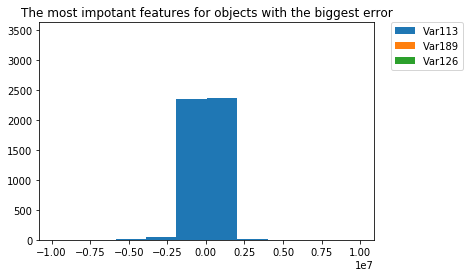

In [82]:
max_err = pd.DataFrame(test_df_selection[test_df_selection.columns[:20]], columns = train_df.columns[indices1[0:20]])
max_err['real_labels'] = test_df_selection['labels'].values
max_err['predicted_labels'] = model.best_estimator_.predict(test_df_selection[test_df_selection.columns[:20]])
max_err['probability'] = model.best_estimator_.predict_proba(test_df_selection[test_df_selection.columns[:20]])[:,1]
plt.hist(max_err[max_err['real_labels'] != max_err['predicted_labels']]['Var113'])
plt.hist(max_err[max_err['real_labels'] != max_err['predicted_labels']]['Var189'])
plt.hist(max_err[max_err['real_labels'] != max_err['predicted_labels']]['Var126'])
plt.legend(['Var113', 'Var189', 'Var126'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The most impotant features for objects with the biggest error')

Text(0.5,1,u'The most impotant features for the whole sample')

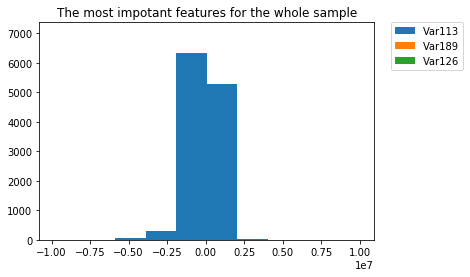

In [83]:
plt.hist(max_err['Var113'])
plt.hist(max_err['Var189'])
plt.hist(max_err['Var126'])
plt.legend(['Var113', 'Var189', 'Var126'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The most impotant features for the whole sample')

###### Ответ
Большая часть ошибок происходит на объектах класса "churn". Распределения важнейших признаков похожи друг на друга и в случае объектов с ошибкой и для всей выборки (можно предположить, что эти признаки похожи на признаки объектов класса "non churn").

9\. По итогам проведенных экспериментов постройте финальную решение - модель с наилучшим качеством. Укажите, какие преобразования данных, параметры и пр. вы выбрали для построения финальной модели.

In [85]:
# загружаем датасет
df = pd.read_csv('orange_small_churn_data.train')
df_labels = pd.read_table('orange_small_churn_labels.train', header = -1, names = ["labels"])
df['labels'] = df_labels

train_df, test_df = model_selection.train_test_split(df, test_size = 0.3)

# классификатор
estimator = xgb.XGBClassifier(learning_rate = 0.05, max_delta_step = 1, max_depth = 3, min_child_weight = 20, n_estimators = 500,
                              subsample = 0.1)
scoring = 'roc_auc'
cv = cross_validation.StratifiedKFold(train_df['labels'], n_folds= 4)

# устанавливаем веса модели
w3 = np.array([1]*train_df['labels'].shape[0])
w3[train_df['labels'] == -1] = 1.
w3[train_df['labels'] == 1] = 1.

# undersampling
dataChurn = train_df[train_df['labels'] == 1]
dataNoChurn = train_df[train_df['labels'] == -1]
countFirst = len(dataChurn)
dataChurn = dataChurn.append(dataNoChurn.iloc[:countFirst,:])

le_data1 = dataChurn
le_data2 = test_df

# label encoding
label_encoder = LabelEncoder()
for i in range(40):
    integer_encoded1 = label_encoder.fit_transform(le_data1[le_data1.columns[190 + i]].fillna(0.).values)
    for j in range(len(le_data1)):
        if type(le_data1[le_data1.columns[190 + i]].values[j]) == str:
            le_data1[le_data1.columns[190 + i]].values[j] = integer_encoded[j]
    integer_encoded2 = label_encoder.fit_transform(le_data2[le_data2.columns[190 + i]].fillna(0.).values)
    for j in range(len(le_data2)):
        if type(le_data2[le_data2.columns[190 + i]].values[j]) == str:
            le_data2[le_data2.columns[190 + i]].values[j] = integer_encoded[j]

# заполняем nan нулями  
le_data1 = le_data1.fillna(0.)
le_data2 = le_data2.fillna(0.)

# отбор признаков
estimator.fit(le_data1[le_data1.columns[:230]], le_data1['labels'], sample_weight = w3, eval_metric='auc')
indices1 = np.argsort(estimator.feature_importances_)[::-1]
train_df = le_data1[le_data1.columns[:230]]
test_df = le_data2[le_data2.columns[:230]]

train_df_selection = train_df[train_df.columns[indices1[0:20]]]
train_df_selection['labels'] = le_data1['labels']
test_df_selection = test_df[test_df.columns[indices1[0:20]]]
test_df_selection['labels'] = le_data2['labels']

# модель
final_model = xgb.XGBClassifier(n_estimators = 50)
final_model.fit(train_df_selection[train_df_selection.columns[:20]], train_df_selection['labels'], sample_weight = w3, eval_metric='auc')
xgb_predictions = final_model.predict(test_df_selection[test_df_selection.columns[:20]]) 
xgb_predictions_proba = final_model.predict_proba(test_df_selection[test_df_selection.columns[:20]]).transpose()[1]
print roc_auc_score(test_df_selection['labels'], xgb_predictions_proba)

C:\Users\mypc\Anaconda2\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mypc\Anaconda2\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.719138170009


10\. Подумайте, можно ли еще улучшить модель? Что для этого можно сделать? 

Можно избавиться от выбросов, протестировать другие модели. Можно попробовать трансформировать отобранные признаки.